# Modules 

In [1]:
import logging

from collections import Counter
from operator import itemgetter

from lxml import etree

from rdkit import Chem
from rdkit.Chem import Draw 
from rdkit.Chem.Draw import IPythonConsole

from IPython.display import Image, display
import requests
# res = requests.get('https://www.ebi.ac.uk/chembl/ws') #Web Service Update (May 2017)
#https://www.ebi.ac.uk/chembl/ws
#https://www.ebi.ac.uk/chemblws/status/
# print(res.ok == True)
# Python modules used for API access...
# By default, the API connects to the main ChEMBL database; set it to use the local version (i.e. myChEMBL) instead...
# from chembl_webresource_client.settings import Settings
# Settings.Instance().NEW_CLIENT_URL = 'http://localhost/chemblws'

import pandas as pd
import matplotlib as plt
import requests
# res = requests.get('https://www.ebi.ac.uk/chembl/ws')
#https://www.ebi.ac.uk/chembl/ws
#https://www.ebi.ac.uk/chemblws/status/
# print(res.ok == True)

# Python modules used for API access...
# By default, the API connects to the main ChEMBL database; set it to use the local version (i.e. myChEMBL) instead...
# from chembl_webresource_client.settings import Settings
# Settings.Instance().NEW_CLIENT_URL = 'http://localhost/chemblws'

from chembl_webresource_client.new_client import new_client

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


/home/bakary/anaconda3/envs/base-copy/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
#take a set of chemical compounds
# return a diversity subsert
# from __future__ import print_function
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, rdMolDescriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import SimDivFilters, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Descriptors
from rdkit import rdBase
# import pubchempy

# from __future__ import print_function
%matplotlib inline

# OBJECTIVES
1 - Compare performaces of the different fingerprints.
2 - Compare the different featuriztion shemes 
3 - Compare the different ML models
4 - Describe the best model
5 - Best models vs Ligand based and Docking 
6 - ML as a third approach to drug discovery. 


https://github.com/delton137/Machine-Learning-Energetic-Molecules-Notebooks

#heteroencoder smile #https://www.wildcardconsulting.dk/learn-how-to-improve-smiles-based-molecular-autoencoders-with-heteroencoders/


More importantly, we can increase the predictive accuracy [114, 115] for machine-learning-based SFs by enlarging the training data set.
"Since increasing structural and interaction data will be accumulated from academic and industrial fields, we consider that machine-learning SFs have the potential to dominate future SFs. However, there is no such universal SF that can work well for every molecular docking computation; thus, we have to develop the scoring functions for a specific aim [66, 116, 117] by integrating different type of SFs in the distant future [118, 119, 120]. Moreover, new types of features (intermolecular features, ligand-only and protein-only features) can be employed to improve the performance of the SFs, and it is also very important to generate these SFs as open software for more researchers in this field to use.

"

A specialized scoring function for DXR.

# METHODS 

- Tpot tune hyperparameters

# Data 
## Retrieve all DXR inhibitors with their smiles from ChemBl

In [8]:
# Like with any other resource type, a complete list of targets can be requested using the client:
records = new_client.target.all()
len(records) # contains all targets in Chembl 

12482

In [9]:
records[1] #access to a single records

{'cross_references': [{'xref_id': 'ABCC9',
   'xref_name': None,
   'xref_src': 'Wikipedia'},
  {'xref_id': 'O60706', 'xref_name': None, 'xref_src': 'canSAR-Target'}],
 'organism': 'Homo sapiens',
 'pref_name': 'Sulfonylurea receptor 2',
 'species_group_flag': False,
 'target_chembl_id': 'CHEMBL1971',
 'target_components': [{'accession': 'O60706',
   'component_description': 'ATP-binding cassette sub-family C member 9',
   'component_id': 294,
   'component_type': 'PROTEIN',
   'relationship': 'SINGLE PROTEIN',
   'target_component_synonyms': [{'component_synonym': 'ABCC9',
     'syn_type': 'GENE_SYMBOL'},
    {'component_synonym': 'ATP-binding cassette sub-family C member 9',
     'syn_type': 'UNIPROT'},
    {'component_synonym': 'SUR2', 'syn_type': 'GENE_SYMBOL_OTHER'},
    {'component_synonym': 'Sulfonylurea receptor 2', 'syn_type': 'UNIPROT'}],
   'target_component_xrefs': [{'xref_id': 'ABCC9',
     'xref_name': 'Cardiomyopathy, dilated, 10; Atrial fibrillation, familial 12; Cantu 

In [10]:
DXR_records = []
DXR_target_ids = []   
for e in records[:]:
#     print(e)
    protein = e['pref_name'].lower()
#     ec = e['target_components']['target_component_synonyms']['component_synonym']
    if 'xylulose' in protein and "reduct" in protein and "phos" in protein:# 'deoxyreductoisomerase':
        for b in e['target_components'][0]['target_component_synonyms']:#[2]:#:
            if '1.1.1.267' in b['component_synonym'] : #'1.1.1.267' EC mumber for DXR
#                 print(b)
                print(e['organism'], protein)# specific organism for the target
                DXR_target_ids.append(e['target_chembl_id'])
 

Escherichia coli K-12 1-deoxyxylulose-5-phosphate reductoisomerase
Synechocystis sp. (strain PCC 6803 / Kazusa) 1-deoxyxylulose-5-phosphate reductoisomerase
Mycobacterium tuberculosis 1-deoxy-d-xylulose 5-phosphate reductoisomerase
Mycobacterium smegmatis (strain ATCC 700084 / mc(2)155) 1-deoxy-d-xylulose 5-phosphate reductoisomerase
Arabidopsis thaliana 1-deoxy-d-xylulose 5-phosphate reductoisomerase, chloroplastic
Escherichia coli 1-deoxy-d-xylulose 5-phosphate reductoisomerase


In [12]:
DXR_target_ids

['CHEMBL4091',
 'CHEMBL4094',
 'CHEMBL5630',
 'CHEMBL2010623',
 'CHEMBL2285354',
 'CHEMBL3421521']

In [5]:
# target_ids = ["CHEMBL1275211", "CHEMBL2052030", "CHEMBL2176852", "CHEMBL2189145", "CHEMBL3559677", "CHEMBL3588732", "CHEMBL6169"]
DXR_inhibitors = pd.DataFrame()
target_ids = DXR_target_ids
total_compounds = 0
props = ['canonical_smiles',  'standard_type', 'standard_relation', 'standard_value','standard_units',  'pchembl_value','activity_id']
for target in target_ids :
    records = new_client.activity.filter(target_chembl_id=target) # get all activities data on the target 
    n_cps = len(records) 
#     print(target, n_cps)#target chembl ID and its the number of activities in it 
    total_compounds += n_cps
#     , 'molecule_chembl_id'
    for compound in records:
#         for prop in props:
# #             print(prop + " = " , compound[prop],)
#             DXR_inhibitors.loc[ compound['molecule_chembl_id'] , prop] = compound[prop]
        for e in compound:
            print(e + ":", compound[e])
        break
            
print(total_compounds)

NameError: name 'DXR_target_ids' is not defined

#
only 345 comps as DXR active in Chembl, there is no PfDXR, while literature mentionned many PfDXR inhibitors. 

In [165]:
DXR_inhibitors.shape #small dataset only 214 inhibitors ?

(214, 9)

#TODO: Add a column for the IC50 per organism
#One compound may have different IC50 per organism. eg: CHEMBL1161705
https://www.ebi.ac.uk/chembl/g/#browse/activities/filter/molecule_chembl_id%3A(%22CHEMBL1161705%22)

In [11]:
import pandas as pd
# DXR_inhibitors.to_csv(path_or_buf="DXR_inhibitors.csv", columns = ["canonical_smiles",  "standard_value"])
DXR_inhibitors = pd.read_csv("DXR_inhibitors.csv")
# !pwd
# !sed "s/,/\t/" DXR_inhibitors.csv -i
# !paste <(cut -f2 -d$'\t' DXR_inhibitors.csv) <(cut -f1 -d$'\t' DXR_inhibitors.csv) > DXR_inhibitors.tsv
# !cp DXR_inhibitors.tsv DXR_inhibitors.smiles
# !babel DXR_inhibitors.smiles DXR_inhibitors.sdf --gen3D
DXR_inhibitors

,Unnamed: 0,canonical_smiles,standard_value
0,CHEMBL1161705,CC(=O)[C@@H](O)CCOP(=O)(O)O,30000.00
1,CHEMBL1161701,CC(=O)C[C@H](O)COP(=O)(O)O,150000.00
2,CHEMBL1161779,ONC(=O)CN(Cc1ccccc1)CP(=O)(O)O,1819.70
3,CHEMBL607353,ON(CCCP(=O)(O)O)C(=O)CNC(=O)CCCOc1ccccc1,200000.00
4,CHEMBL607355,ON(CCCP(=O)(O)O)C(=O)CNC(=O)C1CC1,200000.00
5,CHEMBL607356,ON(CCCP(=O)(O)O)C(=O)C(F)(F)F,14125.38
6,CHEMBL607357,ON(CCCP(=O)(O)O)C(=O)C1CC1,156000.00
7,CHEMBL607490,ON(CCCP(=O)(O)O)C(=O)CCc1ccccc1,50118.72
8,CHEMBL606517,CC(C)(C)C(=O)N(O)CCCP(=O)(O)O,10964.78
9,CHEMBL1161787,CS(=O)(=O)N(O)CCCP(=O)(O)O,38018.94


# Rkdit mol object from their smiles 

In [13]:
#adding rdkit mol object to the table 
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(DXR_inhibitors, smilesCol='canonical_smiles')
#Replace non values with the mean or remove them ?


In [60]:
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
DXR_inhibitors.loc[: ,"standard_value"]
def estate_fingerprint(mol):
    return FingerprintMol(mol)[0]

DXR_inhibitors['es_fp'] = DXR_inhibitors['ROMol'].apply(estate_fingerprint)

In [61]:
DXR_inhibitors['es_fp'] 

In [70]:
from sklearn.preprocessing import MultiLabelBinarizer
df = pd.DataFrame(
    {'groups':
        [['a','b','c'],
        ['c'],
        ['b','c','e'],
        ['a','c'],
        ['b','e']]
    }, columns = ['groups']) 

s = df['groups']

mlb = MultiLabelBinarizer()

pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.index)

,a,b,c,e
0,1,1,1,0
1,0,0,1,0
2,0,1,1,1
3,1,0,1,0
4,0,1,0,1


In [67]:
df   

,groupds


,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,pchembl_value,activity_id,ROMol,fp,es_fp
CHEMBL1161705,CC(=O)[C@@H](O)CCOP(=O)(O)O,Ki,=,30000,nM,4.52,1453418.0,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
CHEMBL1161701,CC(=O)C[C@H](O)COP(=O)(O)O,Ki,=,150000,nM,None,1453421.0,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
CHEMBL1161779,ONC(=O)CN(Cc1ccccc1)CP(=O)(O)O,IC50,=,1819.7,nM,5.74,1508769.0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 5, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
CHEMBL607353,ON(CCCP(=O)(O)O)C(=O)CNC(=O)CCCOc1ccccc1,IC50,>,200000,nM,None,13390257.0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 5, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
CHEMBL607355,ON(CCCP(=O)(O)O)C(=O)CNC(=O)C1CC1,IC50,>,200000,nM,None,13390258.0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...]","[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
CHEMBL607356,ON(CCCP(=O)(O)O)C(=O)C(F)(F)F,IC50,=,14125.38,nM,4.85,1508772.0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
CHEMBL607357,ON(CCCP(=O)(O)O)C(=O)C1CC1,IC50,=,156000,nM,None,13390264.0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
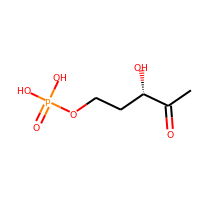
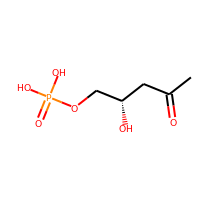
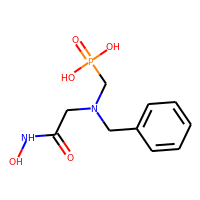
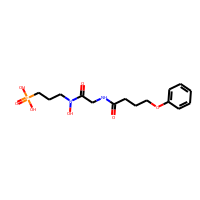
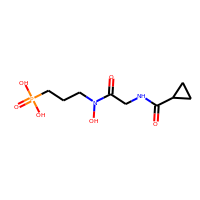
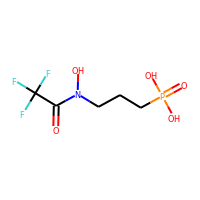
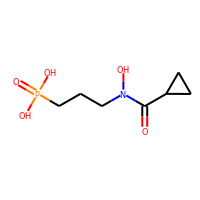
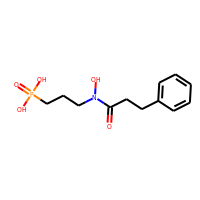
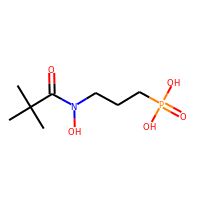
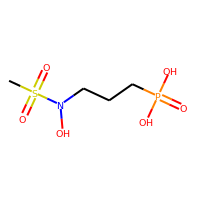
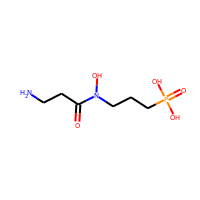
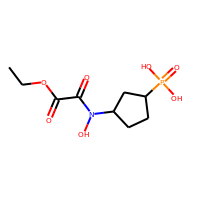
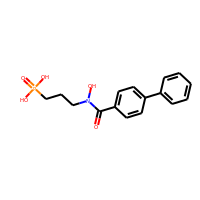
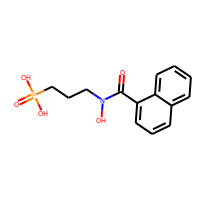
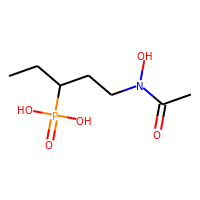
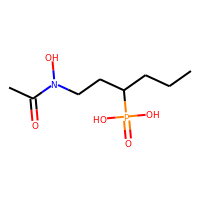
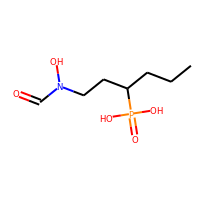
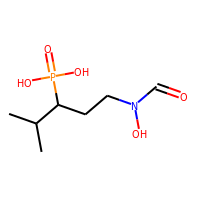
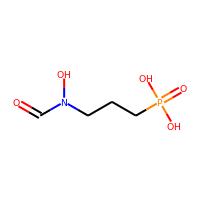
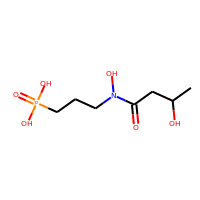
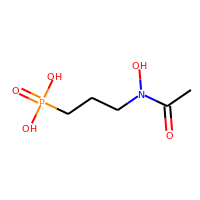
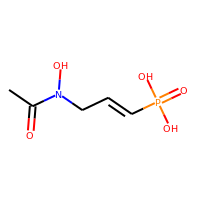
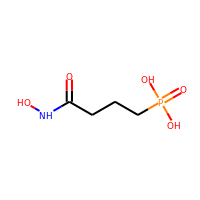
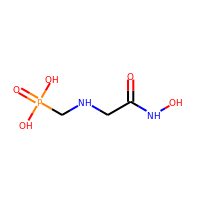
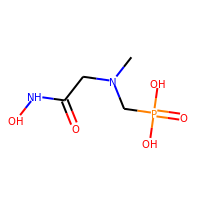
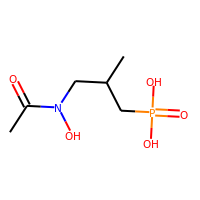
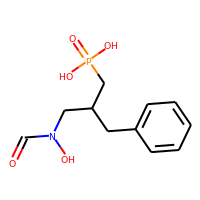
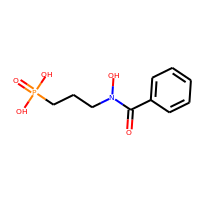
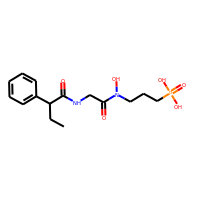
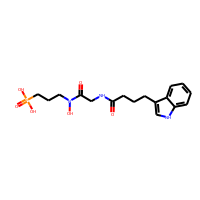
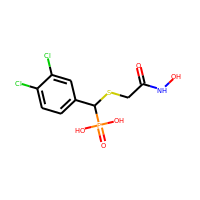
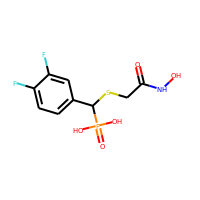
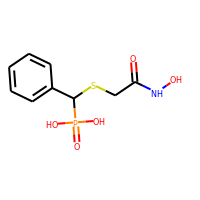
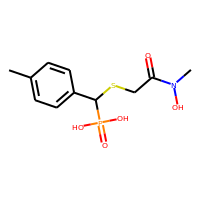
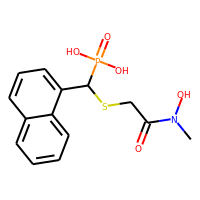
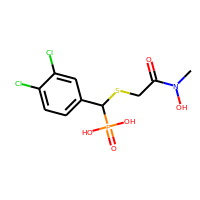
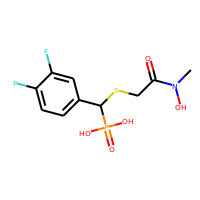
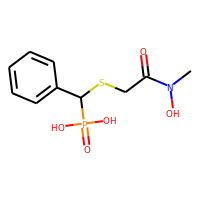
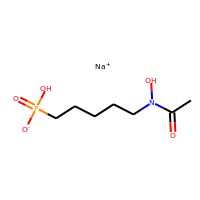
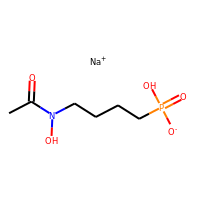
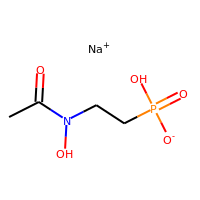
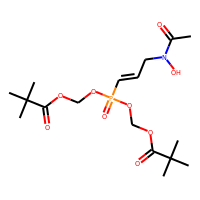
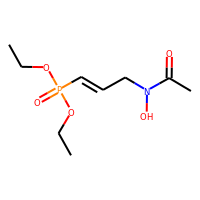
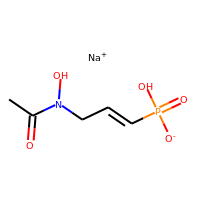
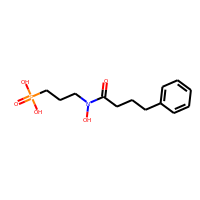
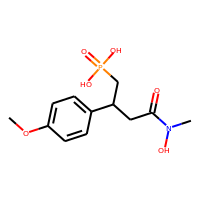
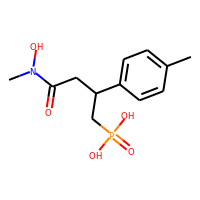
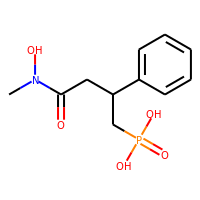
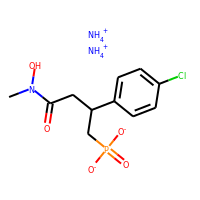
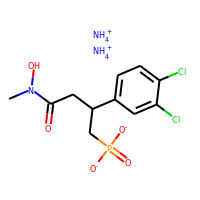
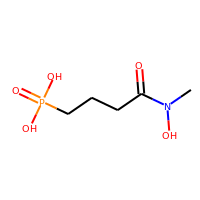
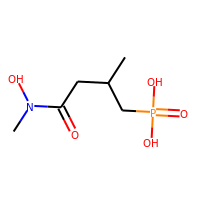
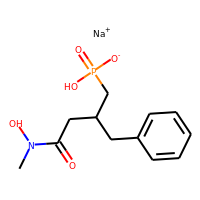
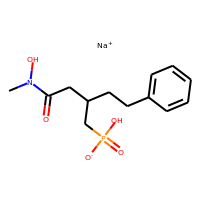
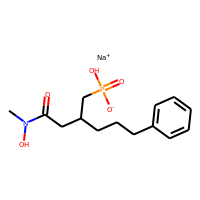
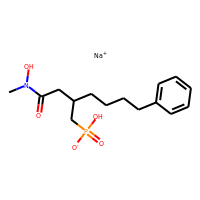
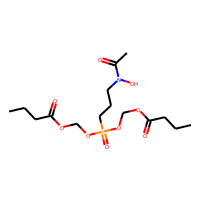
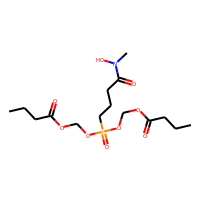
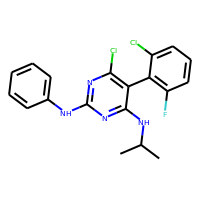
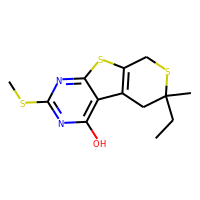

In [172]:
DXR_inhibitors

# Generate fingerprints
which type of fingerprint ?
". However, in molecular machine learning, the model that is used is really not the limiting factor, provided one does their due diligence and explores several classes of models and optimizes their hyperparameters. The component which really determines success is the featurization technique used. The machine learning model can be thought of an black box machine that extracts the nonlinear dependance of Y on X. As long as the black box is large enough and very well tuned and regularized, we don't have to worry about it much. What we need to worry about more is creating the right X from our molecule data so that the black box can do its job. "

Will obspectrophore, es, usr, usrcat... improve models accuracy? 


In [21]:
import numpy as np
#https://iwatobipen.wordpress.com/2018/11/01/run-rdkit-and-deep-learning-on-google-colab-rdkit/
#http://moreisdifferent.com/2017/9/21/DIY-Drug-Discovery-using-molecular-fingerprints-and-machine-learning-for-solubility-prediction/
# 2048 bit vector

def ExplicitBitVect_to_NumpyArray(bitvector):
    #http://moreisdifferent.com/2017/9/21/DIY-Drug-Discovery-using-molecular-fingerprints-and-machine-learning-for-solubility-prediction/
    bitstring = bitvector.ToBitString()
    intmap = map(int, bitstring)
    return np.array(list(intmap))


#convert rdkit mol object to fingerprint 
def mol2fp(mol): 
    #https://iwatobipen.wordpress.com/2018/11/01/run-rdkit-and-deep-learning-on-google-colab-rdkit/
    arr = np.zeros((1,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
#     DataStructs.ConvertToNumpyArray(fp, arr)
    arr = ExplicitBitVect_to_NumpyArray(fp)
    return arr

DXR_inhibitors["fp"] = DXR_inhibitors.ROMol.apply(mol2fp)
DXR_inhibitors

How long can be feature vector in ML? Should we ideally have rows than columns?

https://youtu.be/4H7kg2l4lD8?t=347

In [22]:
#select only need columns, fingerprints and IC50
DXR_inhibitors_ML =  DXR_inhibitors.loc[ : , [ "standard_value" , "fp"] ]
DXR_inhibitors_ML

,standard_value,fp
0,30000.00,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,150000.00,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,1819.70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,200000.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,200000.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...]"
5,14125.38,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
6,156000.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
7,50118.72,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
8,10964.78,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
9,38018.94,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...]"


In [ ]:
# ML tutorial https://public.enthought.com/~achabot/2019-scipy-japan/

# Preprocessing (missing values, normalization)

"We also need to the prepare the values to predict. Here it is the IC50 for some DHFR inhibitors. The data is converted to log space and the robust scaler from scikit-learn is used to scale the data to somewhat between -1 and 1 (neural networks like this range and it makes training somewhat easier)."


In [128]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = np.nan, strategy = 'mean' , axis = 0) # will replace missing value with the mean, not ideal 

imp_value = imp.fit_transform(DXR_inhibitors_ML.iloc[ :, [0] ]) #DXR_inhibitors_ML.loc[ :, "standard_value"]
# df
DXR_inhibitors_ML.standard_value = imp_value

In [129]:
DXR_inhibitors_ML

## Feature engineering 

In [129]:
https://towardsdatascience.com/parallelizing-feature-engineering-with-dask-3db88aec33b7

,standard_value,fp
CHEMBL1161705,30000.00000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL1161701,150000.00000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL1161779,1819.70000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL607353,200000.00000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL607355,200000.00000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL607356,14125.38000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL607357,156000.00000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL607490,50118.72000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL606517,10964.78000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL1161787,38018.94000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...]"


# Make train, validation and test sets 

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(DXR_inhibitors_ML, test_size=0.2) #20% of the data used as test set 

In [131]:
# train
test
train.fp

CHEMBL1801642    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL205091     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL2407193    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL2431005    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL3342261    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL3422254    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL1161706    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL2431010    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL607489     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL2164266    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL2164264    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL2431007    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL3342265    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL607409     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CHEMBL1823398    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# Fitting
## Grid search http://www.davidsbatista.net/blog/2018/02/23/model_optimization/

## Try different ML model with tpot 


In [133]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression(normalize= True)
print(train.shape, train.standard_value.shape)
# lr.fit?

In [136]:
[e for e in train.fp]

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [159]:
# lr.fit(train.fp, train.standard_value)

lr.fit([e for e in train.fp], [e for e in train.standard_value])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Predictions 

In [160]:
y_pred = lr.predict([e for e in test.fp])

In [157]:
# y_pred
[e for e in test.standard_value]

[100.0,
 38018.94,
 31622.78,
 3400.0,
 4600.0,
 100000.0,
 54208.7286904762,
 34000.0,
 273200.0,
 9.2,
 245000.0,
 177.83,
 54208.7286904762,
 54208.7286904762,
 280.0,
 1698.24,
 27200.0,
 1600.0,
 100000.0,
 14125.38,
 50118.72,
 50.0,
 17800.0,
 707.95,
 54208.7286904762,
 48700.0,
 30000.0,
 1800.0,
 90000.0,
 119.0,
 1600.0,
 396.0,
 500000.0,
 311.0,
 53000.0,
 54208.7286904762,
 23988.33,
 320.0,
 54208.7286904762,
 30000.0,
 100.0,
 54208.7286904762,
 6900.0]

# Evaluate 

# Evaluate 
##  Regression metrics 

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true =[e for e in test.standard_value]# test.standard_value
mean_absolute_error = mean_absolute_error(y_true, y_pred)
mean_squared_error = mean_squared_error(y_true, y_pred)
r2_score = r2_score(y_true, y_pred)

print(r2_score, mean_squared_error, mean_absolute_error )

-2.8720581745188986e+24 2.3028207630798445e+34 7.365521431752642e+16


In [119]:
# DXR_inhibitors
import tensorflow as tf
import tensorflow.keras as keras
from keras import Model
from keras.layers import Activation, Dense, Dropout, Input
from keras.utils import np_utils
 

ModuleNotFoundError: No module named 'tensorflow'

In [102]:
 
trainX = np.array([mol2arr(mol) for mol in ])
trainY = [sol_class[mol.GetProp("SOL_classification")] for mol in train_mols]
trainY = np_utils.to_categorical(trainY)
 
testX = np.array([mol2arr(mol) for mol in test_mols])
testY = [sol_class[mol.GetProp("SOL_classification")] for mol in test_mols]
testY = np_utils.to_categorical(testY)

# Hyperparameters optimization with tpot

In [28]:
%%time
from tpot import TPOTRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# housing = load_boston()

In [57]:
# train.fp
train_test_split?

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int or None, optional (default=None)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float, int, or None, (default=None)
    If float, should be between 0.0 a

In [52]:
train.standard_value
target = []
for e in train.standard_value:
    if type(e) != float:
        target.append(0)
    else:
        target.append(e)
        

In [55]:
target = np.array(target)

In [59]:
data = np.array([np.array(e) for e in train.fp])
X_train, X_test, y_train, y_test = train_test_split(data,target ,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

[12:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[12:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [35]:
X_train, X_test, y_train, y_test = train_test_split([e[0] for e in train.fp], train.standard_value,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

ValueError: Error: Input data is not in a valid format. Please confirm that the input data is scikit-learn compatible. For example, the features must be a 2-D array and target labels must be a 1-D array.

# Other approaches 

In [ ]:
#https://www.wildcardconsulting.dk/learn-how-to-teach-your-computer-to-see-chemistry-free-chemception-models-with-rdkit-and-keras/